In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import statistics
from collections import Counter

In [6]:
hurricane_harvey_df = pd.read_csv('/home/cquirk/EventCSVs/hurricane_harvey_df.csv')
hurricane_irma_df = pd.read_csv('/home/cquirk/EventCSVs/hurricane_irma_df.csv')
earthquake_mexico_df = pd.read_csv('/home/cquirk/EventCSVs/earthquake_mexico_df.csv')
hurricane_maria_df = pd.read_csv('/home/cquirk/EventCSVs/hurricane_maria_df.csv')
earthquake_costarica_df = pd.read_csv('/home/cquirk/EventCSVs/earthquake_costarica_df.csv')
earthquake_iran_iraq_df = pd.read_csv('/home/cquirk/EventCSVs/earthquake_iran_iraq_df.csv')
mudslide_california_df = pd.read_csv('/home/cquirk/EventCSVs/mudslide_california_df.csv')
windstorm_friederike_df = pd.read_csv('/home/cquirk/EventCSVs/windstorm_friederike_df.csv')
wildfire_nairobi_df = pd.read_csv('/home/cquirk/EventCSVs/wildfire_nairobi_df.csv')

riot_hamburg_G20_df = pd.read_csv('/home/cquirk/EventCSVs/riot_hamburg_G20_df.csv')
riot_charlottesville_df = pd.read_csv('/home/cquirk/EventCSVs/riot_charlottesville_df.csv')
riot_catalonia_df = pd.read_csv('/home/cquirk/EventCSVs/riot_catalonia_df.csv')
riot_philadelphia_superbowl_df = pd.read_csv('/home/cquirk/EventCSVs/riot_philadelphia_superbowl.csv')

school_shooting_tehama_county_df = pd.read_csv('/home/cquirk/EventCSVs/school_shooting_tehama_county_df.csv')
shooting_trebes_france_df = pd.read_csv('/home/cquirk/EventCSVs/shooting_trebes_france_df.csv')
shooting_youtube_HQ_df = pd.read_csv('/home/cquirk/EventCSVs/shooting_youtube_HQ_df.csv')
van_attack_muenster_df = pd.read_csv('/home/cquirk/EventCSVs/van_attack_muenster_df.csv')
school_shooting_santa_fe_df = pd.read_csv('/home/cquirk/EventCSVs/school_shooting_santa_fe_df.csv')

In [7]:
events = [hurricane_harvey_df, hurricane_irma_df, earthquake_mexico_df, hurricane_maria_df, 
          earthquake_costarica_df, earthquake_iran_iraq_df, mudslide_california_df, windstorm_friederike_df,
          wildfire_nairobi_df, riot_hamburg_G20_df, riot_charlottesville_df, riot_catalonia_df, riot_philadelphia_superbowl_df,
          school_shooting_tehama_county_df, shooting_trebes_france_df, shooting_youtube_HQ_df, van_attack_muenster_df, 
          school_shooting_santa_fe_df]

In [8]:
for event in events: event.insert(5, 'Day', 1)

In [30]:
def generate_graph(input_df, title, filename):
    #create df
    df_freq = pd.DataFrame()

    #sort dates
    df_freq['Date'] = input_df['Timestamp'].unique()
    df_freq['Date'] = pd.to_datetime(df_freq['Date'])
    df_freq = df_freq.sort_values(by='Date')

    #get dates as list
    df_dates = Counter(input_df['Timestamp'])
    df_dates = list(df_dates.keys())
    df_dates = sorted(df_dates)
    n = len(df_dates)

    #initialize with 0s
    df_freq['Anger'] = [0]*n
    df_freq['Anticipation'] = [0]*n
    df_freq['Disgust'] = [0]*n
    df_freq['Fear'] = [0]*n
    df_freq['Joy'] = [0]*n
    df_freq['Sadness'] = [0]*n
    df_freq['Surprise'] = [0]*n
    df_freq['Trust'] = [0]*n
    df_freq['Neutral'] = [0]*n

    #rewrite zeros with appropriate counts
    i = 0
    for date in df_dates:
        day_spec_df = input_df.loc[input_df['Timestamp'] == date]
        df_freq.iloc[i, 1] = Counter(day_spec_df['Emotion'])['Anger']
        df_freq.iloc[i, 2] = Counter(day_spec_df['Emotion'])['Anticipation']
        df_freq.iloc[i, 3] = Counter(day_spec_df['Emotion'])['Disgust']
        df_freq.iloc[i, 4] = Counter(day_spec_df['Emotion'])['Fear']
        df_freq.iloc[i, 5] = Counter(day_spec_df['Emotion'])['Joy']
        df_freq.iloc[i, 6] = Counter(day_spec_df['Emotion'])['Sadness']
        df_freq.iloc[i, 7] = Counter(day_spec_df['Emotion'])['Surprise']
        df_freq.iloc[i, 8] = Counter(day_spec_df['Emotion'])['Trust']
        df_freq.iloc[i, 9] = Counter(day_spec_df['Emotion'])['neutral']
        i = i+1 
    
    #cummulative
    
 #create df
    df_freq_norm = pd.DataFrame()

    #sort dates
    df_freq_norm['Date'] = input_df['Timestamp'].unique()
    df_freq_norm['Date'] = pd.to_datetime(df_freq_norm['Date'])
    df_freq_norm = df_freq_norm.sort_values(by='Date')

    #initialize with 0s
    df_freq_norm['Anger'] = [0]*n
    df_freq_norm['Anticipation'] = [0]*n
    df_freq_norm['Disgust'] = [0]*n
    df_freq_norm['Fear'] = [0]*n
    df_freq_norm['Joy'] = [0]*n
    df_freq_norm['Sadness'] = [0]*n
    df_freq_norm['Surprise'] = [0]*n
    df_freq_norm['Trust'] = [0]*n
    df_freq_norm['Neutral'] = [0]*n
    
    #fill
    i = 0
    for date in df_dates:
        day_spec_df = input_df.loc[input_df['Timestamp'] == date]
        if i == 0:
            df_freq_norm.iloc[i, 1] = Counter(day_spec_df['Emotion'])['Anger']
            df_freq_norm.iloc[i, 2] = Counter(day_spec_df['Emotion'])['Anticipation']
            df_freq_norm.iloc[i, 3] = Counter(day_spec_df['Emotion'])['Disgust']
            df_freq_norm.iloc[i, 4] = Counter(day_spec_df['Emotion'])['Fear']
            df_freq_norm.iloc[i, 5] = Counter(day_spec_df['Emotion'])['Joy']
            df_freq_norm.iloc[i, 6] = Counter(day_spec_df['Emotion'])['Sadness']
            df_freq_norm.iloc[i, 7] = Counter(day_spec_df['Emotion'])['Surprise']
            df_freq_norm.iloc[i, 8] = Counter(day_spec_df['Emotion'])['Trust']
            df_freq_norm.iloc[i, 9] = Counter(day_spec_df['Emotion'])['neutral']
        if i > 0:
            df_freq_norm.iloc[i, 1] = df_freq_norm.iloc[i-1, 1] + Counter(day_spec_df['Emotion'])['Anger']
            df_freq_norm.iloc[i, 2] = df_freq_norm.iloc[i-1, 2] + Counter(day_spec_df['Emotion'])['Anticipation']
            df_freq_norm.iloc[i, 3] = df_freq_norm.iloc[i-1, 3] + Counter(day_spec_df['Emotion'])['Disgust']
            df_freq_norm.iloc[i, 4] = df_freq_norm.iloc[i-1, 4] + Counter(day_spec_df['Emotion'])['Fear']
            df_freq_norm.iloc[i, 5] = df_freq_norm.iloc[i-1, 5] + Counter(day_spec_df['Emotion'])['Joy']
            df_freq_norm.iloc[i, 6] = df_freq_norm.iloc[i-1, 6] + Counter(day_spec_df['Emotion'])['Sadness']
            df_freq_norm.iloc[i, 7] = df_freq_norm.iloc[i-1, 7] + Counter(day_spec_df['Emotion'])['Surprise']
            df_freq_norm.iloc[i, 8] = df_freq_norm.iloc[i-1, 8] + Counter(day_spec_df['Emotion'])['Trust']
            df_freq_norm.iloc[i, 9] = df_freq_norm.iloc[i-1, 9] + Counter(day_spec_df['Emotion'])['neutral'] 
        i = i+1 


    #as percent of total messages
    #df_freq_norm = df_freq.copy()
    df_freq_norm['SUM'] = df_freq_norm.sum(axis=1, numeric_only=True)
    df_freq_norm[['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust', 'Neutral']] = df_freq_norm[['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust', 'Neutral']].div(df_freq_norm['SUM'], axis=0)
    
    fig, axs = plt.subplots(1,2, figsize=[14,6]) 

    #counts
    df_freq.plot( x = 'Date' , y = 'Anger', color = '#d62728', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = 'Anticipation', color = '#ff7f0e', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = 'Disgust', color = '#2ca02c', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = 'Fear',color = '#9467bd', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = 'Joy', color = '#bcbd22', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = 'Sadness',color = '#17becf', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = 'Surprise', color = '#e377c2', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = 'Trust', color = '#1f77b4', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = 'Neutral', color = 'gray', ax = axs[0]) 

    #freqs
    df_freq_norm.plot( x = 'Date' , y = 'Anger', color = '#d62728', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = 'Anticipation', color = '#ff7f0e', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = 'Disgust', color = '#2ca02c', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = 'Fear',color = '#9467bd', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = 'Joy', color = '#bcbd22', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = 'Sadness',color = '#17becf', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = 'Surprise', color = '#e377c2', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = 'Trust', color = '#1f77b4', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = 'Neutral', color = 'gray', ax = axs[1]) 

    for ax in axs:
        ax.set_xlabel('')
    axs[0].set_ylabel('Daily New Messages', fontsize = 15)
    axs[1].set_ylabel('Cummulative Frequency', fontsize = 15)
 

    fig.suptitle(title, fontsize = 20)
    plt.savefig(filename + '.png')


In [20]:
def generate_graph_a_m(input_df, title, filename):
    #create df
    df_freq_a = pd.DataFrame()
    df_freq_m = pd.DataFrame()

    #sort dates
    df_freq_a['Date'] = input_df['Timestamp'].unique()
    df_freq_a['Date'] = pd.to_datetime(df_freq_a['Date'])
    df_freq_a = df_freq_a.sort_values(by='Date')
    
    df_freq_m['Date'] = input_df['Timestamp'].unique()
    df_freq_m['Date'] = pd.to_datetime(df_freq_m['Date'])
    df_freq_m = df_freq_m.sort_values(by='Date')

    #get dates as list
    df_dates = Counter(input_df['Timestamp'])
    df_dates = list(df_dates.keys())
    df_dates = sorted(df_dates)
    n = len(df_dates)

    #initialize with 0s
    df_freq_a['High Arousal'] = [0]*n
    df_freq_a['Low Arousal'] = [0]*n
    
    df_freq_m['High Misery'] = [0]*n
    df_freq_m['Low Misery'] = [0]*n

    #rewrite zeros with appropriate counts
    i = 0
    for date in df_dates:
        day_spec_df = input_df.loc[input_df['Timestamp'] == date]
        if i == 0:
            df_freq_a.iloc[i, 1] = Counter(day_spec_df['Emotion'])['Anger'] + Counter(day_spec_df['Emotion'])['Anticipation'] + Counter(day_spec_df['Emotion'])['Fear'] + Counter(day_spec_df['Emotion'])['Surprise']
            df_freq_a.iloc[i, 2] = Counter(day_spec_df['Emotion'])['Sadness'] + Counter(day_spec_df['Emotion'])['Trust'] + Counter(day_spec_df['Emotion'])['Joy'] + Counter(day_spec_df['Emotion'])['Disgust'] + Counter(day_spec_df['Emotion'])['neutral']
            df_freq_m.iloc[i, 1] = Counter(day_spec_df['Emotion'])['Anger'] + Counter(day_spec_df['Emotion'])['Fear'] + Counter(day_spec_df['Emotion'])['Sadness'] + Counter(day_spec_df['Emotion'])['Disgust']
            df_freq_m.iloc[i, 2] = Counter(day_spec_df['Emotion'])['Trust'] + Counter(day_spec_df['Emotion'])['Joy'] + Counter(day_spec_df['Emotion'])['Anticipation'] + Counter(day_spec_df['Emotion'])['Surprise'] + Counter(day_spec_df['Emotion'])['neutral']
        
        if i > 0:
            df_freq_a.iloc[i, 1] = Counter(day_spec_df['Emotion'])['Anger'] + Counter(day_spec_df['Emotion'])['Anticipation'] + Counter(day_spec_df['Emotion'])['Fear'] + Counter(day_spec_df['Emotion'])['Surprise'] + df_freq_a.iloc[i-1, 1]
            df_freq_a.iloc[i, 2] = Counter(day_spec_df['Emotion'])['Sadness'] + Counter(day_spec_df['Emotion'])['Trust'] + Counter(day_spec_df['Emotion'])['Joy'] + Counter(day_spec_df['Emotion'])['Disgust'] + Counter(day_spec_df['Emotion'])['neutral'] + df_freq_a.iloc[i-1, 2]
            df_freq_m.iloc[i, 1] = Counter(day_spec_df['Emotion'])['Anger'] + Counter(day_spec_df['Emotion'])['Fear'] + Counter(day_spec_df['Emotion'])['Sadness'] + Counter(day_spec_df['Emotion'])['Disgust'] + df_freq_m.iloc[i-1, 1]
            df_freq_m.iloc[i, 2] = Counter(day_spec_df['Emotion'])['Trust'] + Counter(day_spec_df['Emotion'])['Joy'] + Counter(day_spec_df['Emotion'])['Anticipation'] + Counter(day_spec_df['Emotion'])['Surprise'] + Counter(day_spec_df['Emotion'])['neutral'] + df_freq_m.iloc[i-1, 2]
        
        i = i+1 
                
    #as percent of total messages
    df_freq_norm_a = df_freq_a.copy()
    df_freq_norm_a['SUM'] = df_freq_norm_a.sum(axis=1, numeric_only=True)
    df_freq_norm_a[['High Arousal', 'Low Arousal']] = df_freq_norm_a[['High Arousal', 'Low Arousal']].div(df_freq_norm_a['SUM'], axis=0)

    df_freq_norm_m = df_freq_m.copy()
    df_freq_norm_m['SUM'] = df_freq_norm_m.sum(axis=1, numeric_only=True)
    df_freq_norm_m[['High Misery', 'Low Misery']] = df_freq_norm_m[['High Misery', 'Low Misery']].div(df_freq_norm_m['SUM'], axis=0)

    #make plots
    fig, axs = plt.subplots(1,2, figsize=[14,6]) 

    #Arousal
    df_freq_norm_a.plot( x = 'Date' , y = 'High Arousal', color = '#bf2424', ax = axs[0]) 
    df_freq_norm_a.plot( x = 'Date' , y = 'Low Arousal', color = '#1aa7ec', ax = axs[0]) 
    
    #Misery
    df_freq_norm_m.plot( x = 'Date' , y = 'High Misery', color = '#7739ad', ax = axs[1]) 
    df_freq_norm_m.plot( x = 'Date' , y = 'Low Misery', color = '#d4cb2c', ax = axs[1]) 
   
    for ax in axs:
        ax.set_xlabel('')
        ax.set_ylim(0,1)
    axs[0].set_ylabel('Cummulative Frequency', fontsize = 15)
    axs[1].set_ylabel('Cummulative Frequency', fontsize = 15)
    axs[0].set_title('High and Low Arousal', fontsize = 15)
    axs[1].set_title('High and Low Misery', fontsize = 15)

 

    fig.suptitle(title, fontsize = 20)
    plt.savefig(filename + '.png')


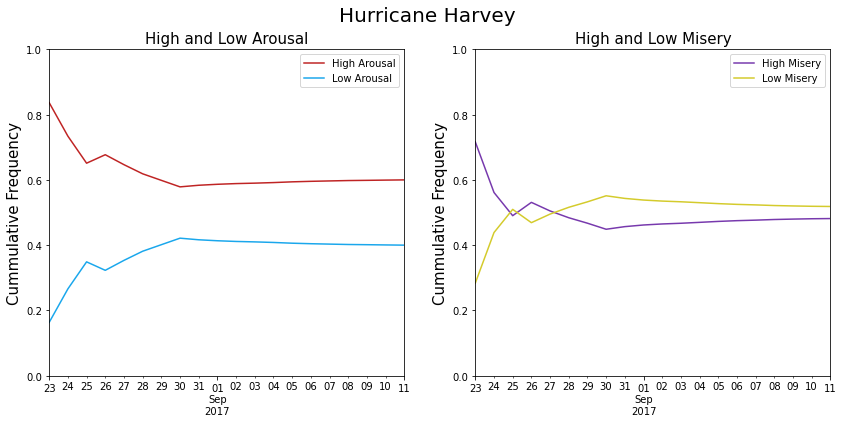

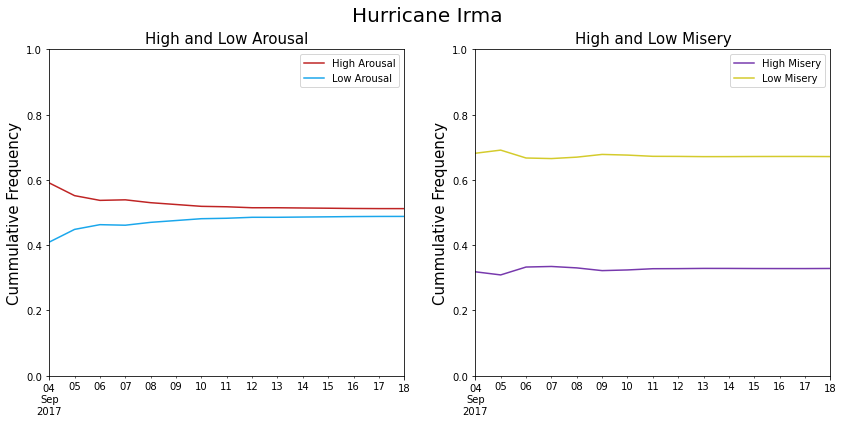

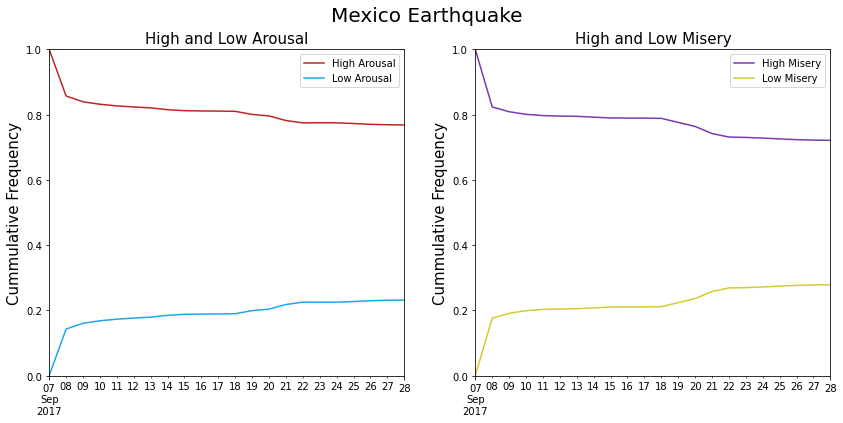

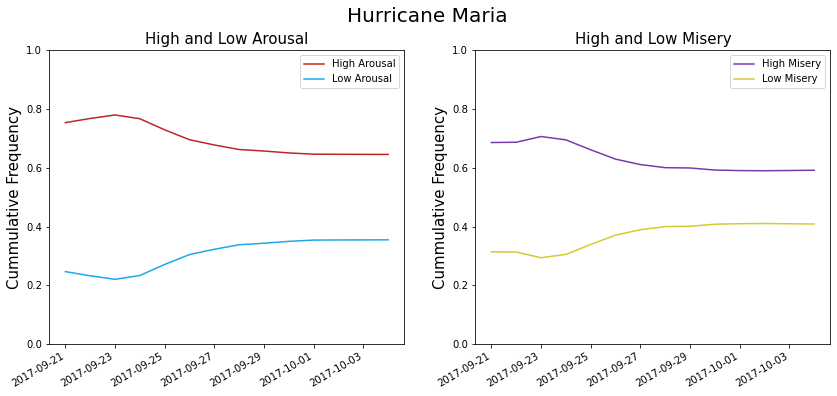

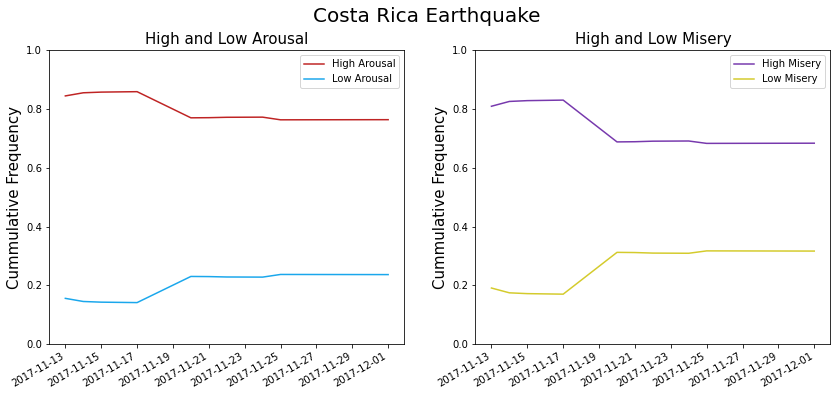

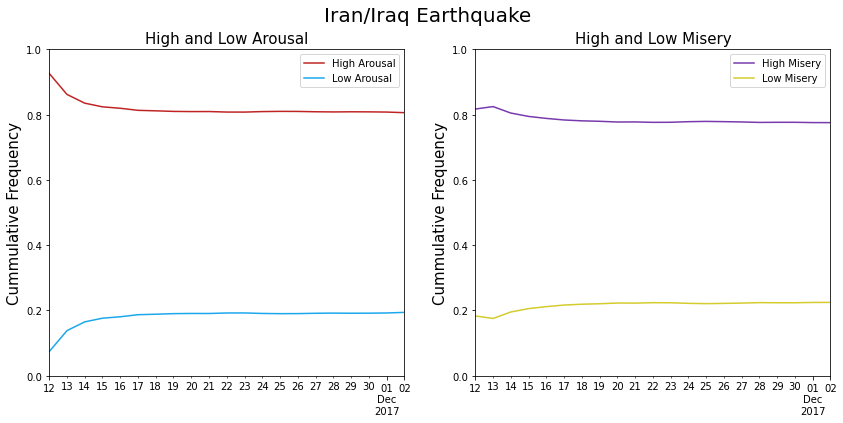

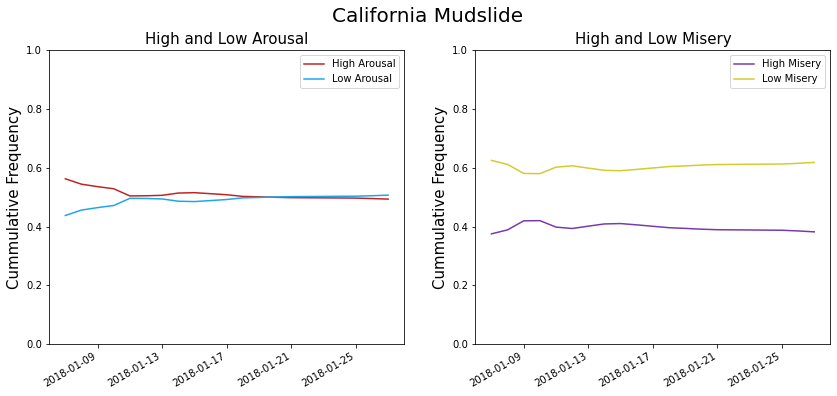

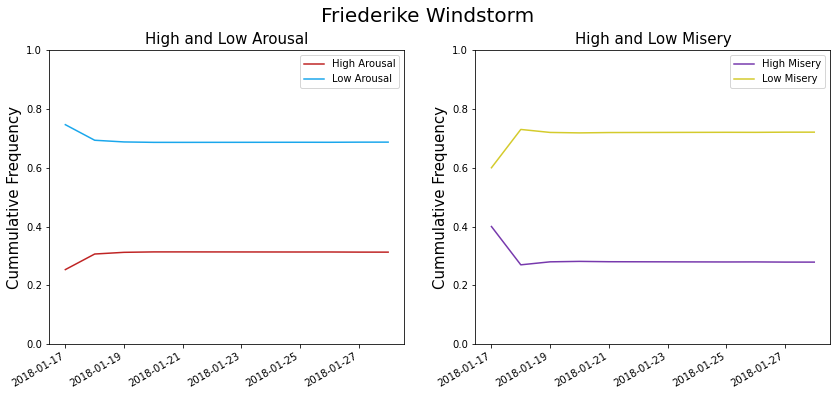

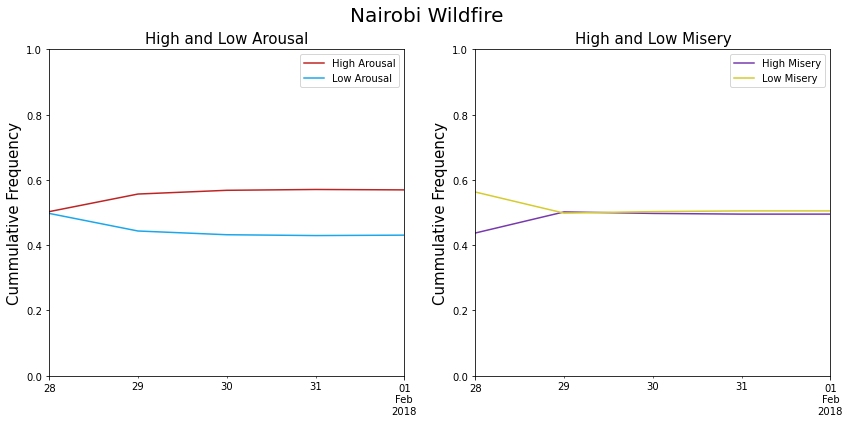

In [21]:
#Natural Disasters
generate_graph_a_m(hurricane_harvey_df, 'Hurricane Harvey', 'HarveyAM')
generate_graph_a_m(hurricane_irma_df, 'Hurricane Irma', 'IrmaAM')
generate_graph_a_m(earthquake_mexico_df, 'Mexico Earthquake', 'MexAM')
generate_graph_a_m(hurricane_maria_df, 'Hurricane Maria', 'MariaAM')
generate_graph_a_m(earthquake_costarica_df, 'Costa Rica Earthquake', 'CostaAM')
generate_graph_a_m(earthquake_iran_iraq_df, 'Iran/Iraq Earthquake', 'IranAM')
generate_graph_a_m(mudslide_california_df, 'California Mudslide', 'CalAM')
generate_graph_a_m(windstorm_friederike_df, 'Friederike Windstorm', 'FriedAM')
generate_graph_a_m(wildfire_nairobi_df, 'Nairobi Wildfire', 'NaiAM')

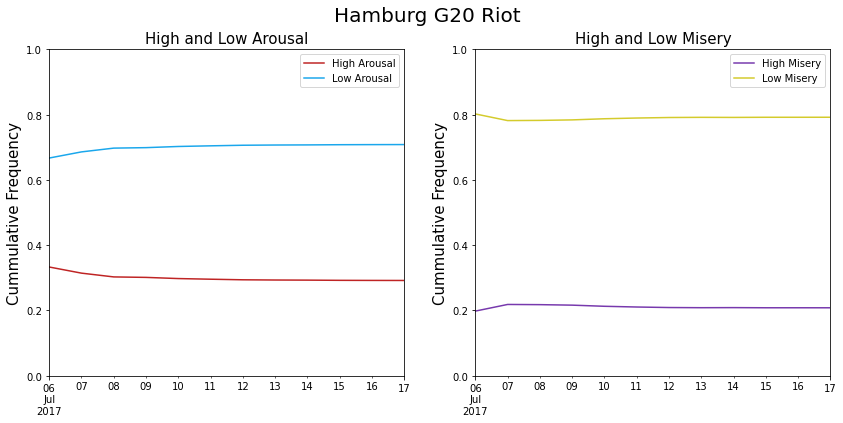

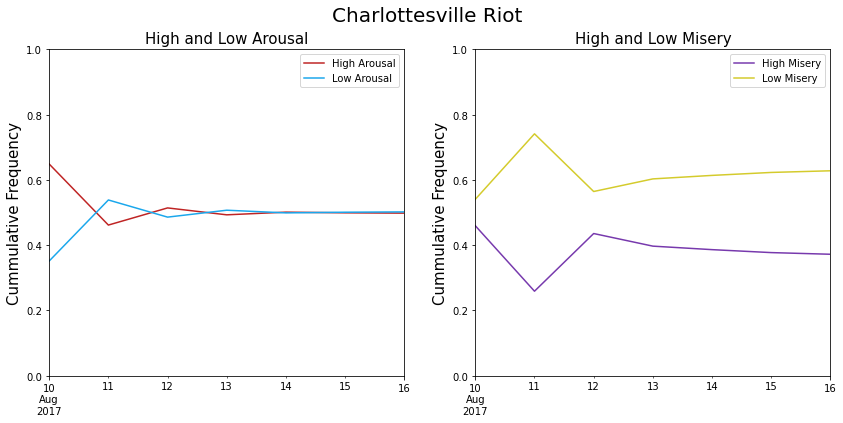

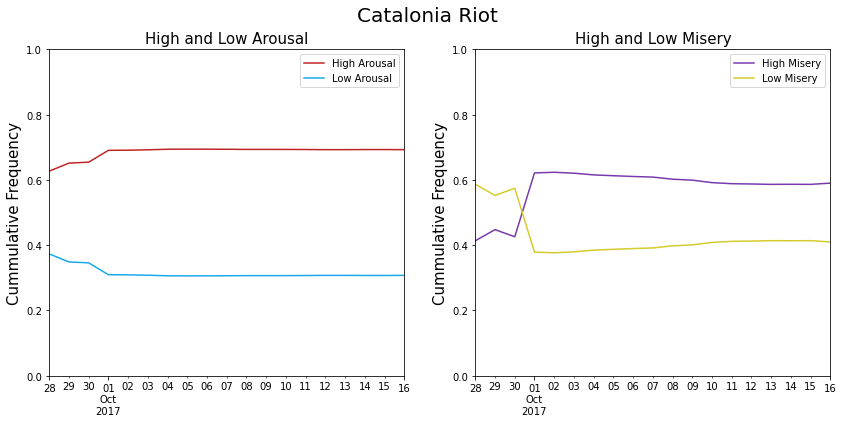

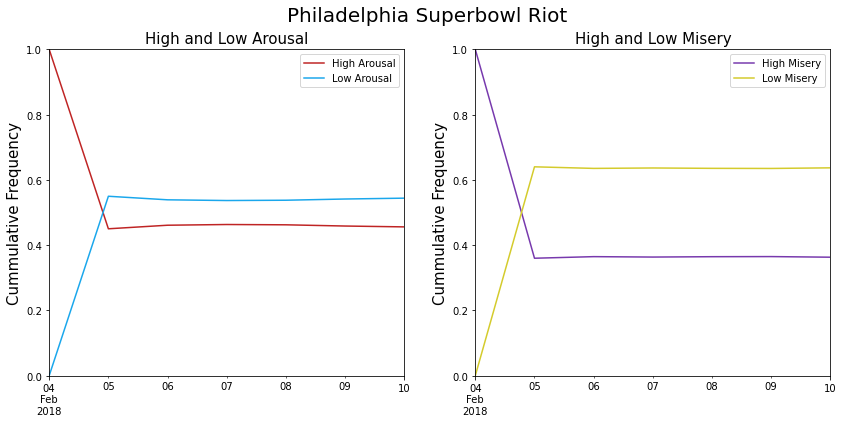

In [22]:
#Riots
generate_graph_a_m(riot_hamburg_G20_df, 'Hamburg G20 Riot', 'HamAM')
generate_graph_a_m(riot_charlottesville_df, 'Charlottesville Riot', 'CharAM')
generate_graph_a_m(riot_catalonia_df, 'Catalonia Riot', 'CatAM')
generate_graph_a_m(riot_philadelphia_superbowl_df, 'Philadelphia Superbowl Riot', 'SupAM')

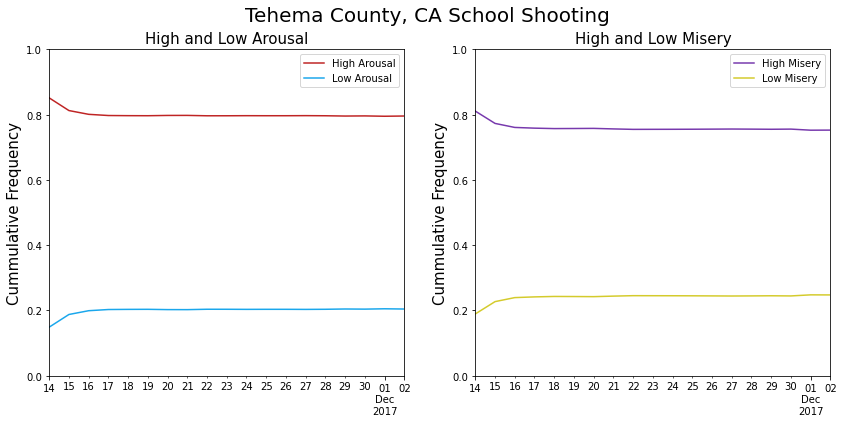

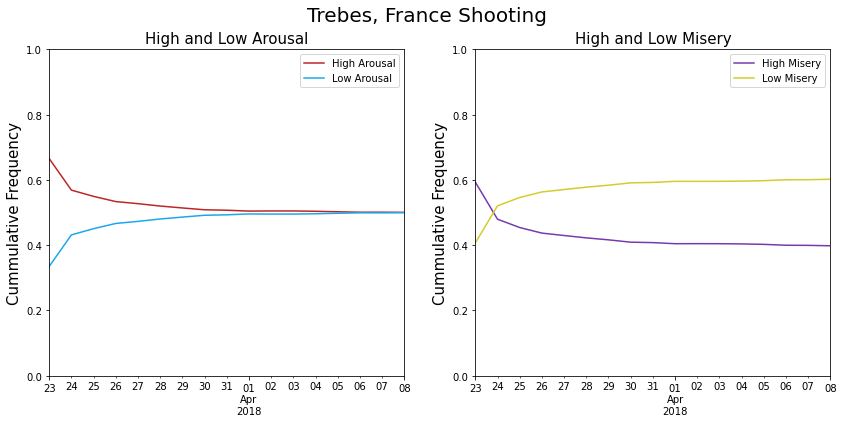

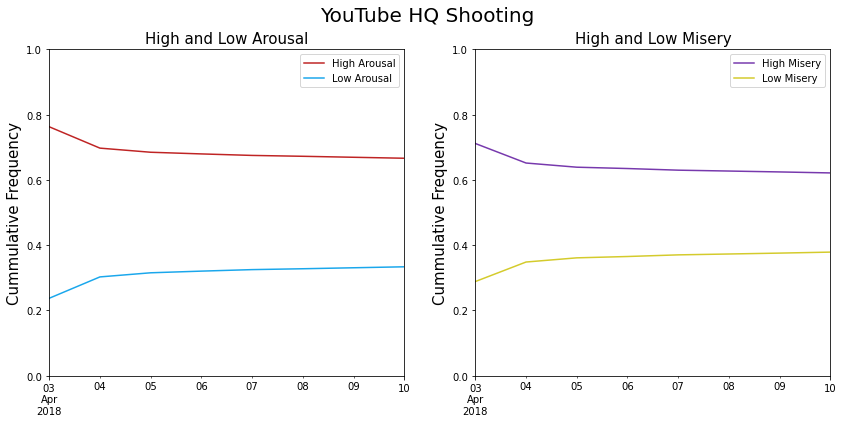

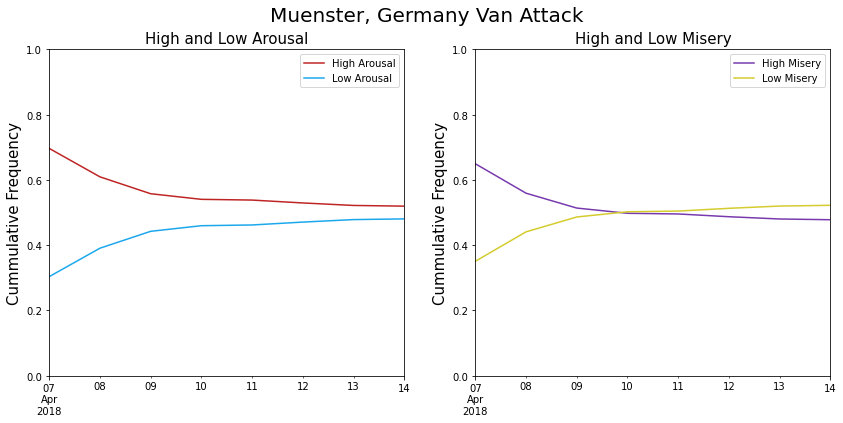

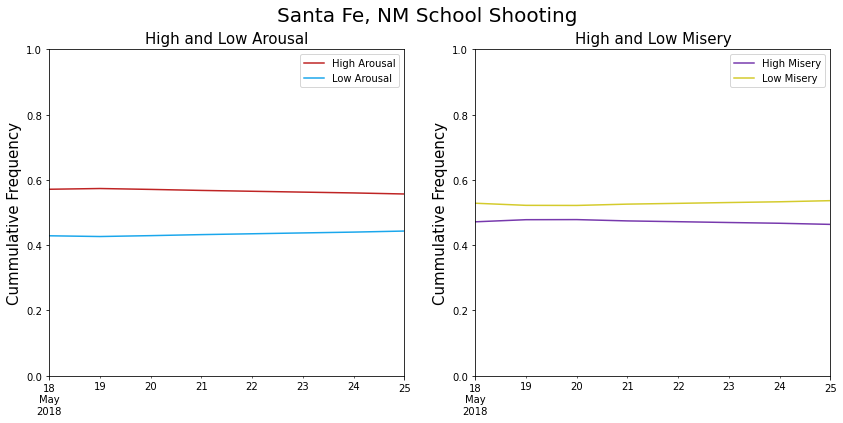

In [23]:
#Terror Attacks
generate_graph_a_m(school_shooting_tehama_county_df, 'Tehema County, CA School Shooting', "TehAM")
generate_graph_a_m(shooting_trebes_france_df, 'Trebes, France Shooting', 'TrebAM')
generate_graph_a_m(shooting_youtube_HQ_df, 'YouTube HQ Shooting', 'YouAM')
generate_graph_a_m(van_attack_muenster_df, 'Muenster, Germany Van Attack', 'MuenAM')
generate_graph_a_m(school_shooting_santa_fe_df, 'Santa Fe, NM School Shooting', 'SanAM')

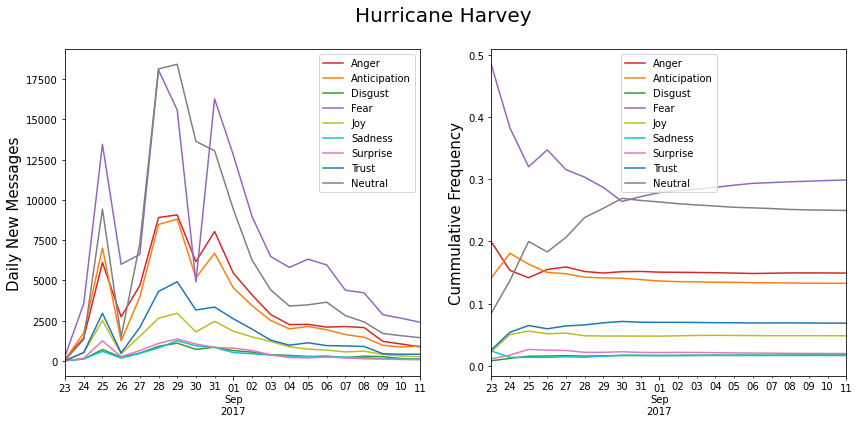

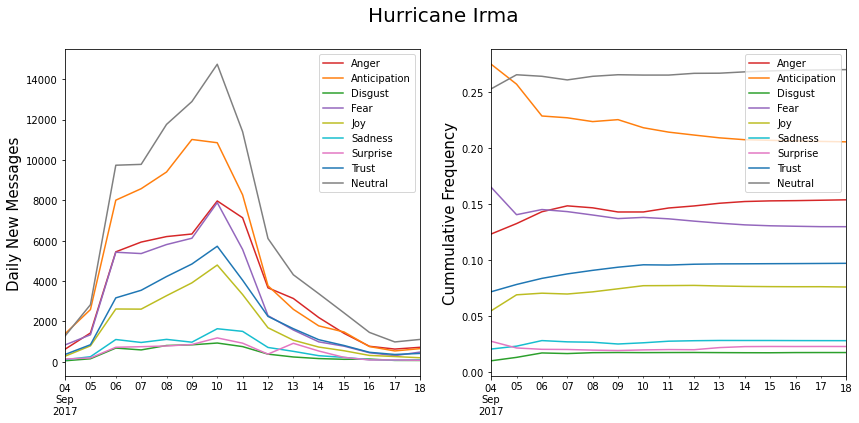

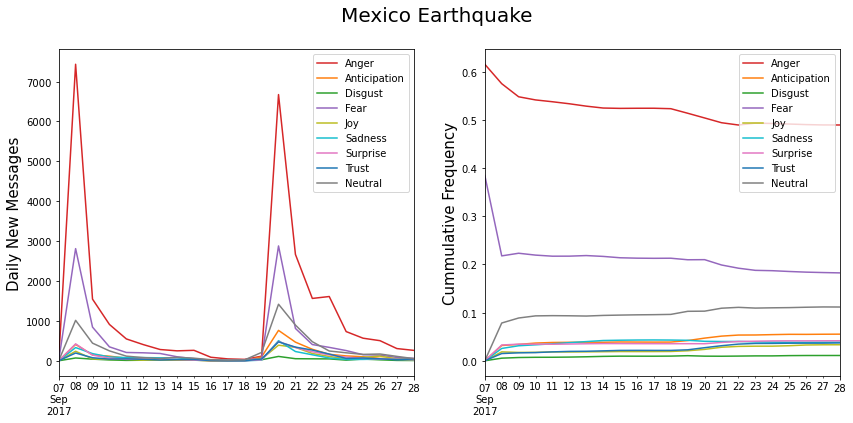

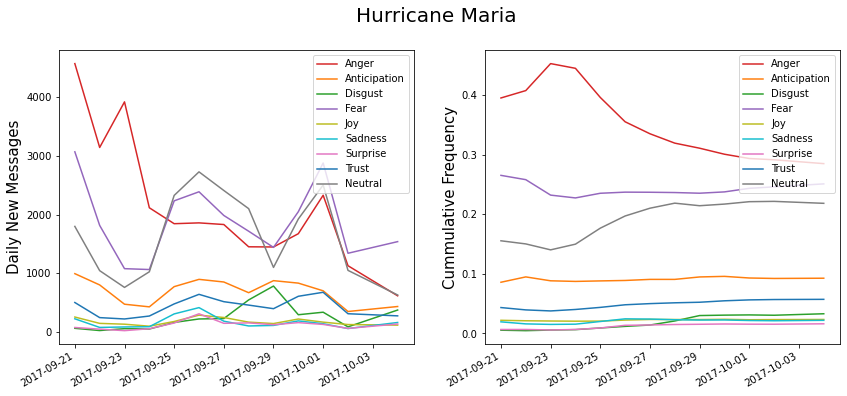

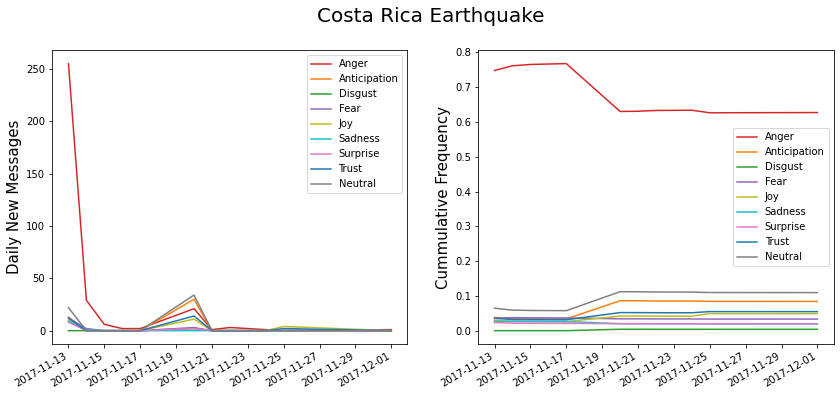

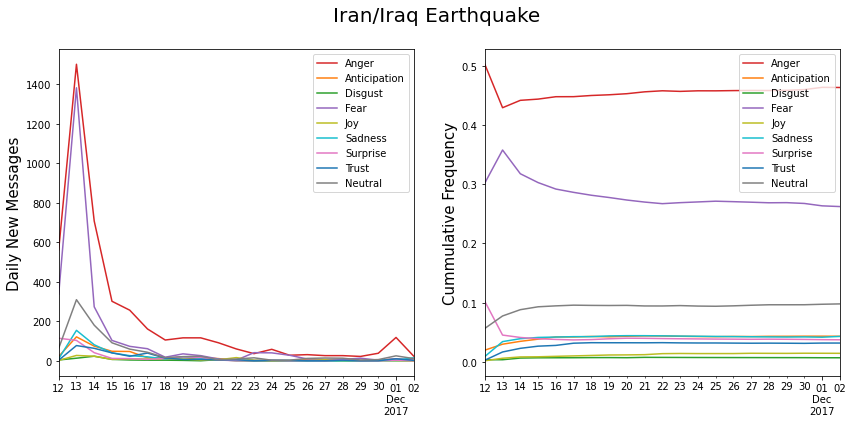

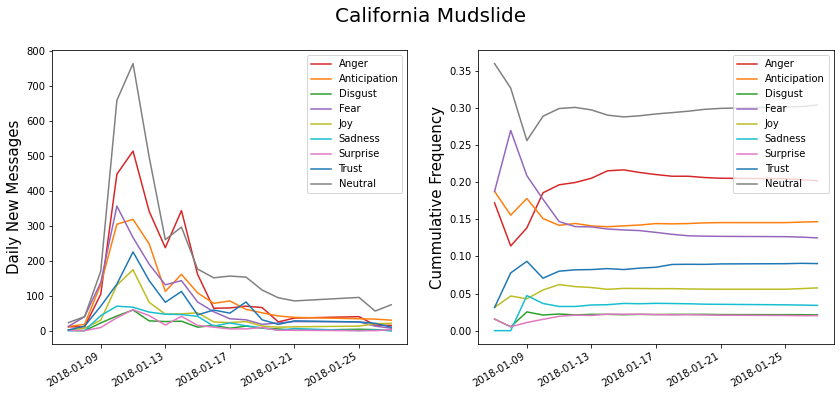

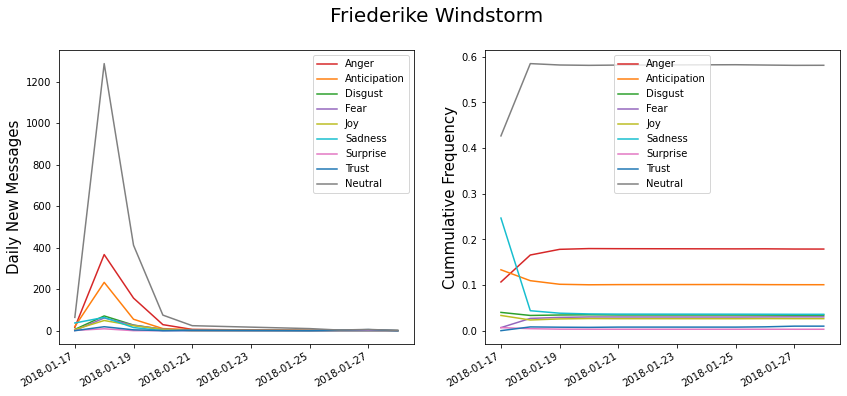

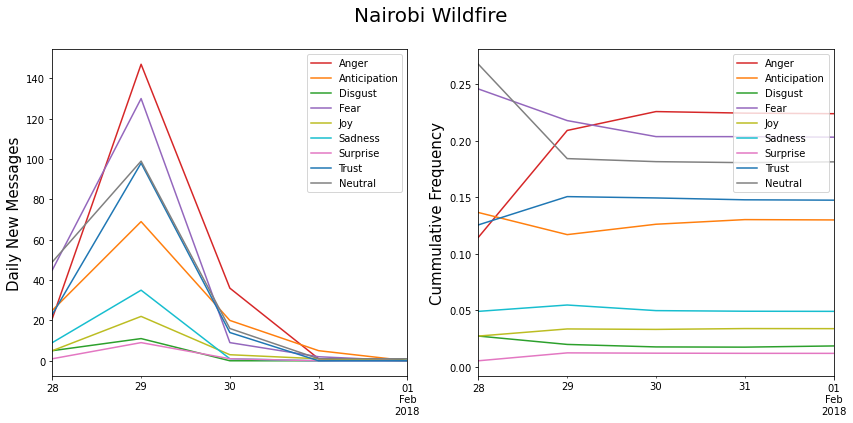

In [31]:
#Natural Disasters
generate_graph(hurricane_harvey_df, 'Hurricane Harvey', 'HarveyF')
generate_graph(hurricane_irma_df, 'Hurricane Irma', 'IrmaF')
generate_graph(earthquake_mexico_df, 'Mexico Earthquake', 'MexF')
generate_graph(hurricane_maria_df, 'Hurricane Maria', 'MariaF')
generate_graph(earthquake_costarica_df, 'Costa Rica Earthquake', 'CostaF')
generate_graph(earthquake_iran_iraq_df, 'Iran/Iraq Earthquake', 'IranF')
generate_graph(mudslide_california_df, 'California Mudslide', 'CalF')
generate_graph(windstorm_friederike_df, 'Friederike Windstorm', 'FriedF')
generate_graph(wildfire_nairobi_df, 'Nairobi Wildfire', 'NaiF')

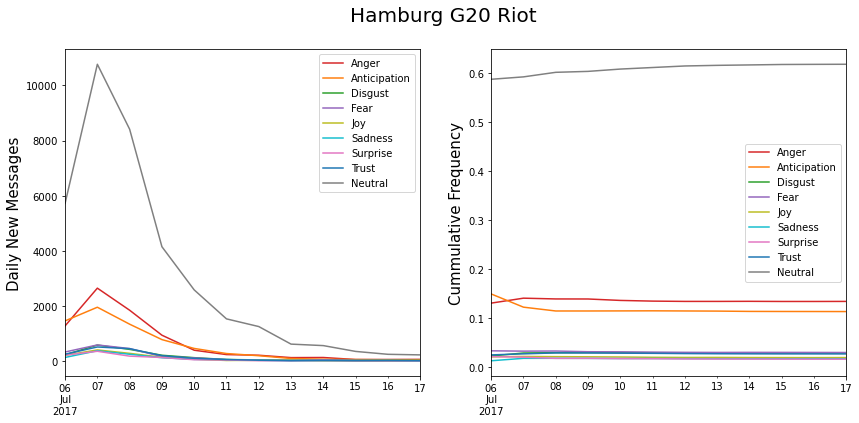

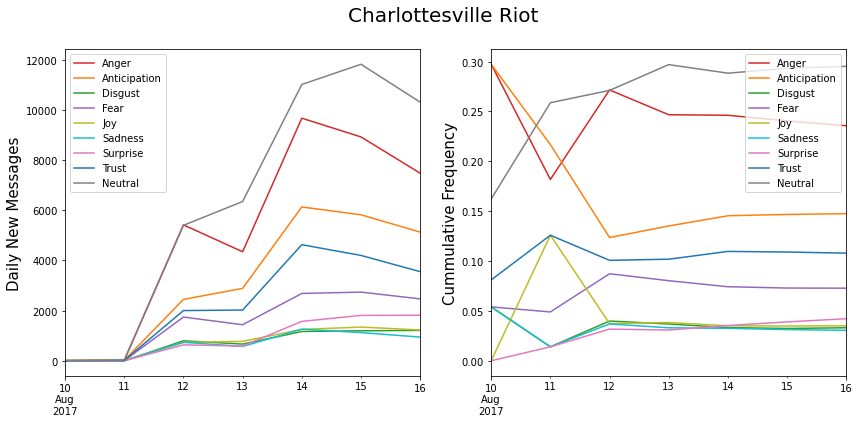

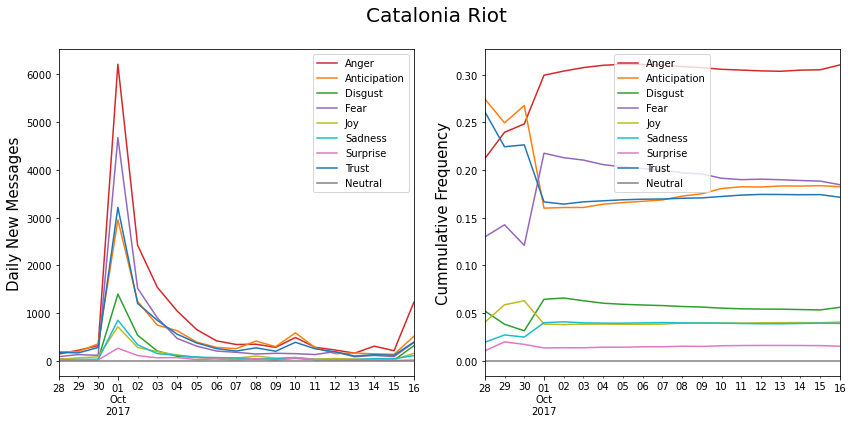

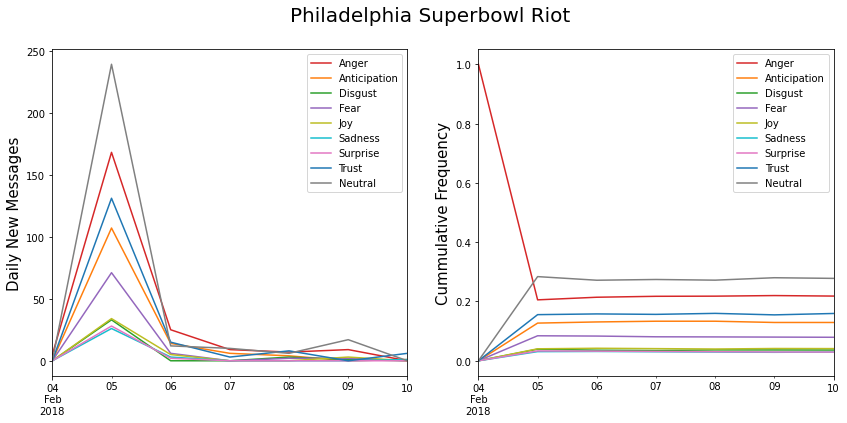

In [32]:
#Riots
generate_graph(riot_hamburg_G20_df, 'Hamburg G20 Riot', 'HamF')
generate_graph(riot_charlottesville_df, 'Charlottesville Riot', 'CharF')
generate_graph(riot_catalonia_df, 'Catalonia Riot', 'CatF')
generate_graph(riot_philadelphia_superbowl_df, 'Philadelphia Superbowl Riot', 'SupF')

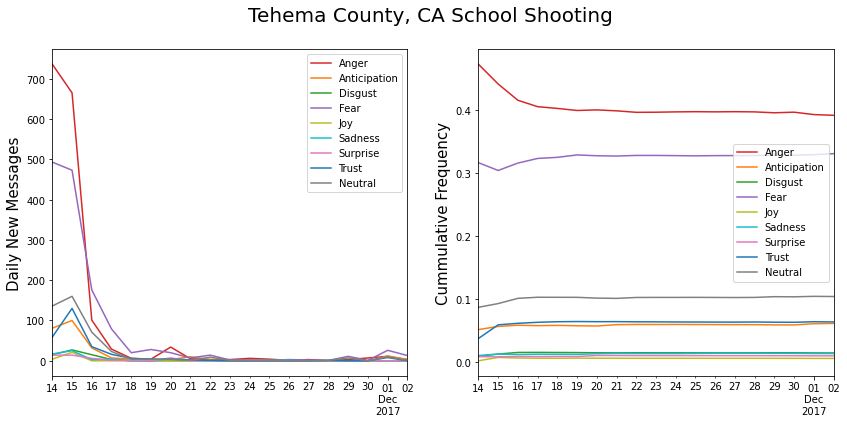

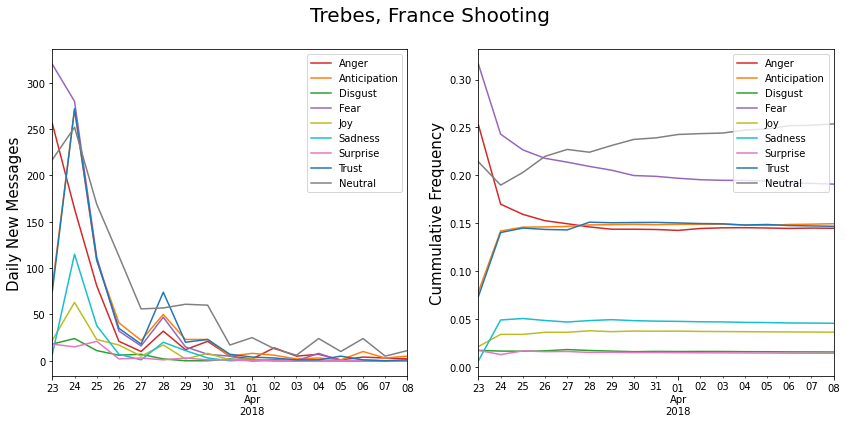

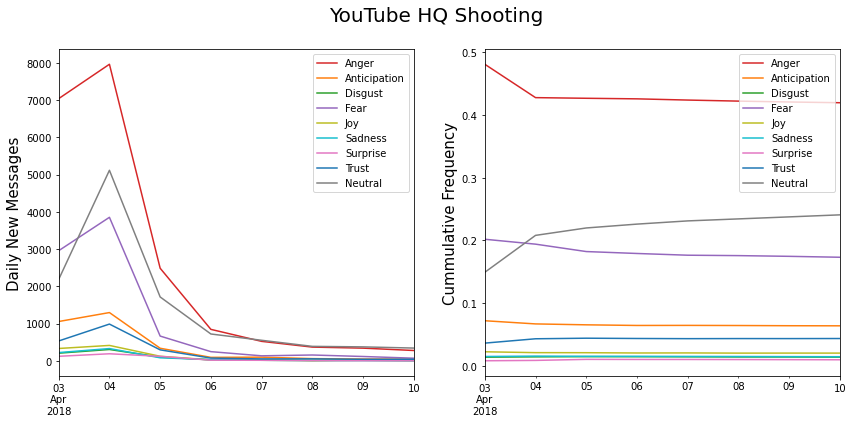

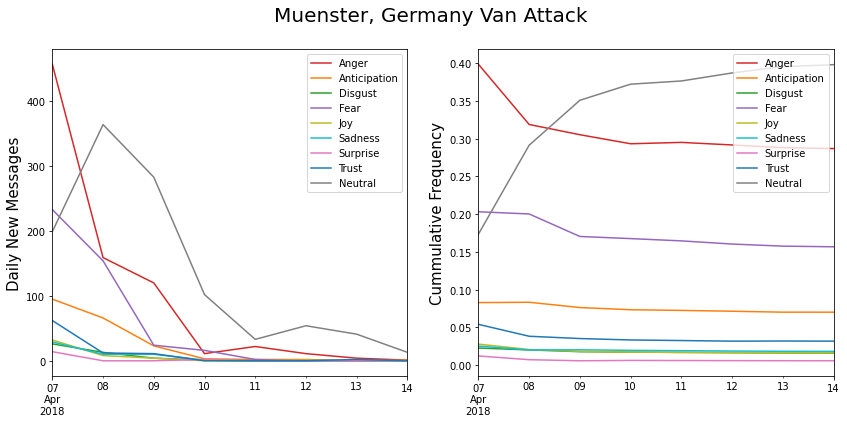

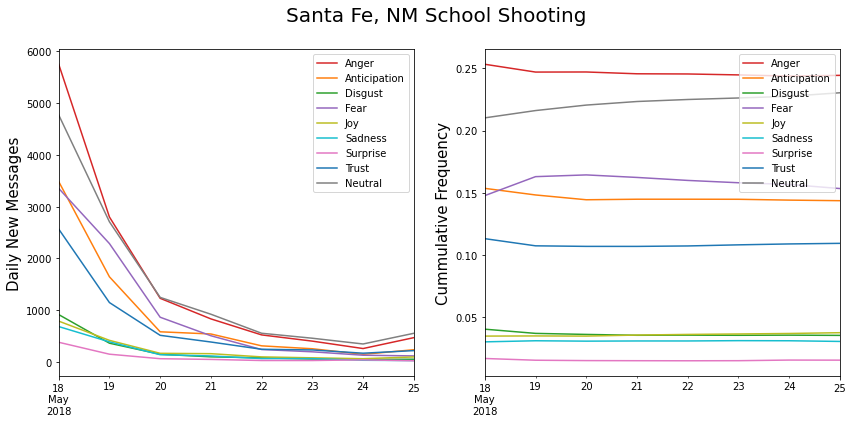

In [33]:
#Terror Attacks
generate_graph(school_shooting_tehama_county_df, 'Tehema County, CA School Shooting', "TehF")
generate_graph(shooting_trebes_france_df, 'Trebes, France Shooting', 'TrebF')
generate_graph(shooting_youtube_HQ_df, 'YouTube HQ Shooting', 'YouF')
generate_graph(van_attack_muenster_df, 'Muenster, Germany Van Attack', 'MuenF')
generate_graph(school_shooting_santa_fe_df, 'Santa Fe, NM School Shooting', 'SanF')